In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

from math import sqrt
from sklearn.metrics import mean_squared_error

from fredapi import Fred

from qreit.models.api_config import *
fred_key = fred_API

import time

import matplotlib.pyplot as plt
%matplotlib inline

/Users/marktblack/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


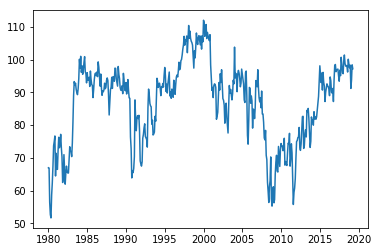

In [2]:
fred = Fred(fred_key)

UMCSENT_df = fred.get_series('UMCSENT').to_frame()
UMCSENT_df.columns = ['UMCSENT']
UMCSENT_80_df = UMCSENT_df[UMCSENT_df.index >= '1980-01']

plt.plot(UMCSENT_80_df)
plt.show()

In [3]:
UMCSENT_80_df['UMCSENT_1'] = UMCSENT_80_df.shift(-1)
UMCSENT_80_df.dropna(inplace=True)

/Users/marktblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/marktblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()

# UMCSENT_80_X_scaled = scaler.fit_transform(UMCSENT_80_df['UMCSENT'].to_frame())
# UMCSENT_80_y_scaled = scaler.fit_transform(UMCSENT_80_df['UMCSENT_1'].to_frame())

In [5]:
# test = int(len(UMCSENT_80_X_scaled)*0.90)

# X_train_scaled = UMCSENT_80_X_scaled[:test]
# y_train_scaled = UMCSENT_80_y_scaled[:test]
# y_train = UMCSENT_80_df['UMCSENT_1'][:test]

# X_test_scaled = UMCSENT_80_X_scaled[test:]
# y_test_scaled = UMCSENT_80_y_scaled[test:]
# y_test = UMCSENT_80_df['UMCSENT_1'][test:]

In [6]:
# X_train = np.reshape(X_train_scaled, 
#                      (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
# X_test = np.reshape(X_test_scaled, 
#                     (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [7]:
# n_lookback = 1

In [8]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(n_lookback,X_train.shape[2]), 
#                activation='relu', return_sequences=True))
# # model.add(Dropout(0.2))
# # model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())

# model.add(LSTM(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(1, activation='softmax'))

# model.compile(loss='mae', optimizer='RMSprop')

In [9]:
# model = Sequential()
# model.add(LSTM(60, dropout=0.1, recurrent_dropout=0.2, return_sequences=True,
#               input_shape=(n_lookback, X_train.shape[2])))
# # model.add(Dropout(0.2))

# model.add(LSTM(32, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(X_train.shape[2]))

# # opt = tf.keras.optimizers.RMSprop(lr=0.001)

# model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae'])

In [10]:
# def rnn_hyperparameter_tune(X_train, y_train_scaled, n_epochs, batchSize):
#     model.fit(X_train, 
#               y_train_scaled, 
#               epochs=n_epochs,
#               batch_size=batchSize, 
#               verbose=0,
#               shuffle=False)
    
#     yhat_scale = model.predict(X_test)
    
#     y_hat_inv_scaled = scaler.inverse_transform(yhat_scale)
#     temp_root_sq_mu_err = sqrt(mean_squared_error(y_test.values, y_hat_inv_scaled))
#     temp_root_sq_mu_err_per = round(sqrt(mean_squared_error(y_test.values, y_hat_inv_scaled))/y_test.values.mean()*100,4)
    
#     print(f'# of Epochs, Batch Size: {n_epochs}, {batchSize}')
#     print('Test RMSE: %.3f' % temp_root_sq_mu_err)
#     print(f'RMSE %: {temp_root_sq_mu_err_per}%\n')
    
#     return temp_root_sq_mu_err

In [11]:
# root_sq_mu_err_ls = []

# for epochs in range(100, 500, 100):
#     root_sq_mu_err_ls.append(rnn_hyperparameter_tune(X_train, y_train_scaled, epochs, 40))

In [12]:
# N_EPOCHS = 200
# batchSize = 40

# model.fit(X_train, 
#           y_train_scaled, 
#           epochs=N_EPOCHS,
#           batch_size=batchSize, 
#           verbose=0,
#           shuffle=False)


In [13]:
# yhat_scale = model.predict(X_test)
# # yhat_scale

In [14]:
# inv_yhat = np.concatenate((X_test_scaled, yhat_scale), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)

In [15]:
# y_hat_inv_scaled = scaler.inverse_transform(yhat_scale)
# preds_actuals_df = pd.DataFrame(y_test.values, 
#                                 y_hat_inv_scaled.flatten()).reset_index(drop=False)
# preds_actuals_df.columns = ['preds', 'actual']
# preds_actuals_df.assign(diff=preds_actuals_df.preds-preds_actuals_df.actual)


In [16]:
# y_hat_inv_scaled

In [17]:
# from math import sqrt
# from sklearn.metrics import mean_squared_error

# print('Test RMSE: %.3f' % sqrt(mean_squared_error(y_test.values,
#                                                  y_hat_inv_scaled)))
# print(f'RMSE %: {round(sqrt(mean_squared_error(y_test.values, y_hat_inv_scaled))/y_test.values.mean()*100,4)}%')

### beer

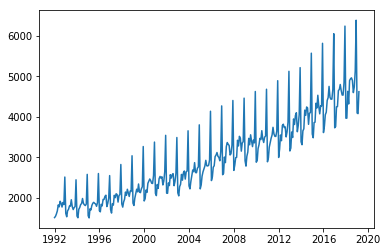

In [18]:
beer_df = fred.get_series('MRTSSM4453USN').to_frame()
beer_df.columns = ['beer']
beer_df = beer_df[beer_df.index >= '1980-01']
beer_df['beer_1'] = beer_df.shift(-1)
plt.plot(beer_df['beer'])
plt.show()

In [19]:
beer_UMCSENT_df = pd.merge(beer_df, UMCSENT_80_df, 
                            how='left', right_index=True, left_index=True).dropna()

In [20]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()

# beer_UMCSENT_X_scaled = scaler.fit_transform(beer_UMCSENT_df[['beer', 'UMCSENT']])
# beer_UMCSENT_y_scaled = scaler.fit_transform(beer_UMCSENT_df[['UMCSENT_1']])

In [21]:
# test = int(len(beer_UMCSENT_X_scaled)*0.95)

# X_train_scaled = beer_UMCSENT_X_scaled[:test]
# y_train_scaled = beer_UMCSENT_y_scaled[:test]
# y_train = beer_UMCSENT_df[['beer_1','UMCSENT_1']][:test]

# X_test_scaled = beer_UMCSENT_X_scaled[test:]
# y_test_scaled = beer_UMCSENT_y_scaled[test:]
# y_test = beer_UMCSENT_df[['UMCSENT_1']][test:]

In [22]:
# X_train = np.reshape(X_train_scaled, 
#                      (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

# X_test = np.reshape(X_test_scaled, 
#                     (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [23]:
# model = Sequential()
# model.add(LSTM(60, dropout=0.1, recurrent_dropout=0.2, return_sequences=True,
#               input_shape=(n_lookback, X_train.shape[2]),  activation='relu'))
# model.add(Dropout(0.2))

# model.add(LSTM(32, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(X_train.shape[1]))

# # opt = tf.keras.optimizers.RMSprop(lr=0.001)

# model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae'])

In [24]:
# N_EPOCHS =100
# batchSize = 40

# model.fit(X_train, 
#           y_train_scaled, 
#           epochs=N_EPOCHS,
#           batch_size=batchSize, 
#           verbose=1,
#           shuffle=False)

In [25]:
# yhat_scale = model.predict(X_test)
# # yhat_scale

In [26]:
# inv_yhat = np.concatenate((X_test_scaled, yhat_scale), axis=1)
# inv_yhat = scaler.inverse_transform(yhat_scale)

In [27]:
# y_hat_inv_scaled = scaler.inverse_transform(yhat_scale)
# preds_df = pd.DataFrame(y_hat_inv_scaled, columns=['UMCSENT_preds'])

In [28]:
# # y_test = y_test.assign(beer_preds=preds_df['beer_preds'].values)
# y_test['UMCSENT_preds'] = preds_df['UMCSENT_preds'].values

# # beer_preds_actual_df = y_test[['beer_1', 'beer_preds']]
# UMCSENT_preds_actual_df = y_test[['UMCSENT_1', 'UMCSENT_preds']]

# # beer_preds_actual_df = beer_preds_actual_df.assign(beer_diff=(beer_preds_actual_df.beer_preds-\
# #                                                   beer_preds_actual_df.beer_1))
# UMCSENT_preds_actual_df = UMCSENT_preds_actual_df.assign(UMCSENT_diff=(UMCSENT_preds_actual_df.UMCSENT_preds-\
#                                                           UMCSENT_preds_actual_df.UMCSENT_1))


In [29]:
# print('Test RMSE: %.3f' % sqrt(mean_squared_error(beer_preds_actual_df.beer_1,
#                                                  beer_preds_actual_df.beer_preds)))
# print(f'RMSE %: {round(sqrt(mean_squared_error(beer_preds_actual_df.beer_1, beer_preds_actual_df.beer_preds))/beer_preds_actual_df.beer_1.mean()*100,4)}%')

In [30]:
# plt.figure(figsize=(12,5))
# plt.plot(beer_preds_actual_df.beer_1, label='actual')
# plt.plot(beer_preds_actual_df.beer_preds, label='pred')
# plt.title(f'Beer')
# plt.legend()
# plt.show()

In [31]:
# print('Test RMSE: %.3f' % sqrt(mean_squared_error(UMCSENT_preds_actual_df.UMCSENT_1,
#                                                  UMCSENT_preds_actual_df.UMCSENT_preds)))
# print(f'RMSE %: {round(sqrt(mean_squared_error(UMCSENT_preds_actual_df.UMCSENT_1, UMCSENT_preds_actual_df.UMCSENT_preds))/UMCSENT_preds_actual_df.UMCSENT_1.mean()*100,4)}%')


In [32]:
# plt.figure(figsize=(12,5))
# plt.plot(UMCSENT_preds_actual_df.UMCSENT_1, label='actual')
# plt.plot(UMCSENT_preds_actual_df.UMCSENT_preds, label='pred')
# plt.title(f'US Michigan CS')
# plt.legend()
# plt.show()

### Keras

In [33]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.layers import LSTM

In [34]:
# def keras_lstm(x_train, y_train_scaled, X_test, 
#                N_EPOCHS, batchSize, neuron_1):
#     model = Sequential()
#     model.add(LSTM(neuron_1, 
#                    batch_input_shape=(batchSize, x_train.shape[1], x_train.shape[2]), 
#                    stateful=True, activation='relu'))
#     model.add(Dropout(0.2))
# #     model.add(LSTM(neuron_2, activation='relu'))
# #     model.add(Dropout(0.1))    
#     model.add(Dense(X_train.shape[2]))
    
#     model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae'])
    
#     model.fit(X_train, y_train_scaled, 
#               epochs=N_EPOCHS,
#               batch_size=batchSize, 
#               verbose=1,
#               shuffle=False)
#     yhat_scale = model.predict(X_test, batch_size=batchSize)
#     return yhat_scale


In [35]:
# yhat_scale_preds = keras_lstm(X_train, y_train_scaled, X_test, 50, 1, 1, )

In [36]:
def inverse_scale(inv_preds):
    return scaler.inverse_transform(inv_preds)

In [37]:
# inverse_scale(yhat_scale_preds)

## LSTM model

In [38]:
from qreit.models.lstm.data_processor import *
from qreit.models.lstm.model import *

default_configs = default_configs

Using TensorFlow backend.


In [39]:
spx_df = pd.read_csv('./data/sp500.csv')
print(len(spx_df))
spx_df.head()

4697


,Date,Open,High,Low,Close,Volume
0,03-01-00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,04-01-00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,05-01-00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,06-01-00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,07-01-00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [40]:
data = DataLoader(spx_df, 0.85, ['Close', 'Volume'])

model = Model()
model.build_model()
x, y = data.get_train_data(50, True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[Model] Model Compiled
Time taken: 0:00:00.458049


In [41]:
# in-memory training
model.train(
    x,
    y,
    epochs = 2,
    batch_size = default_configs['training']['batch_size'],
    save_dir = default_configs['model']['save_dir']
)

[Model] Training Started
[Model] 2 epochs, 32 batch size
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
3942/3942 [==============================] - 14s 4ms/step - loss: 0.0010
Epoch 2/2
  32/3942 [..............................] - ETA: 12s - loss: 3.8700e-04

/Users/marktblack/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/Users/marktblack/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


3942/3942 [==============================] - 13s 3ms/step - loss: 5.2888e-04
[Model] Training Completed. Model saved as saved_models/10062019-170048-e2.h5
Time taken: 0:00:29.720070


In [42]:
# model.train_generator(data,
#                      steps_per_epoch = math.ceil((data.len_train - \
#                                                   default_configs['data']['sequence_length']) / \
#                                                   default_configs['training']['batch_size']))


In [45]:
x_test, y_test = data.get_test_data(seq_len=50,
                                     normalise=True)

In [46]:
predictions = model.predict_point_by_point(x_test)

[Model] Predicting Point-by-Point...


In [47]:
preds_actuals_df = pd.DataFrame(predictions, y_test.flatten()).reset_index(drop=False)
preds_actuals_df.columns = ['predictions', 'actuals']
preds_actuals_df.assign(diff=preds_actuals_df.predictions-preds_actuals_df.actuals)

,predictions,actuals,diff
0,-0.069247,-0.074416,0.005169
1,-0.077845,-0.082964,0.005119
2,-0.053745,-0.083938,0.030194
3,-0.069208,-0.093736,0.024528
4,-0.085627,-0.087217,0.001590
5,-0.084550,-0.088952,0.004402
6,-0.082019,-0.083693,0.001674
7,-0.100084,-0.085356,-0.014728
8,-0.112707,-0.078819,-0.033888
9,-0.113822,-0.057991,-0.055831


In [48]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white', figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

In [49]:
# i_split = int(len(beer_UMCSENT_df)*0.85)
# train_test = beer_UMCSENT_df.get(['beer', 'UMCSENT']).values[:i_split]
# test_test = beer_UMCSENT_df.get(['beer', 'UMCSENT']).values[i_split:]

# len_test = len(test_test)

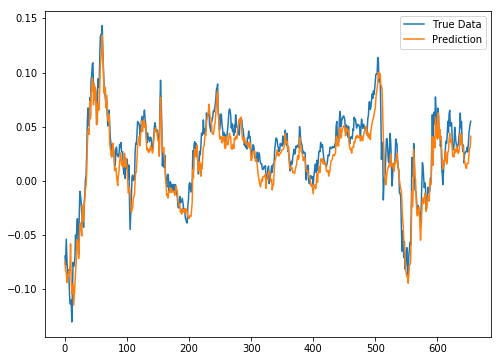

In [50]:
plot_results(predictions, y_test)

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(predictions, actuals):
    return sqrt(mean_squared_error(actuals, predictions))

In [52]:
print(f'RMSE: {rmse(predictions, y_test)}')

RMSE: 0.014508413119602147
